In [18]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [20]:
! cp kaggle.json ~/.kaggle/


In [21]:
! chmod 600 ~/.kaggle/kaggle.json


In [22]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [24]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression



In [25]:
data_dir = './'
train_path = './Train'
# test_path = './input/gtsrb-german-traffic-sign/'


In [26]:
#IMG_HEIGHT = 30
#IMG_WIDTH = 30
#channels = 3

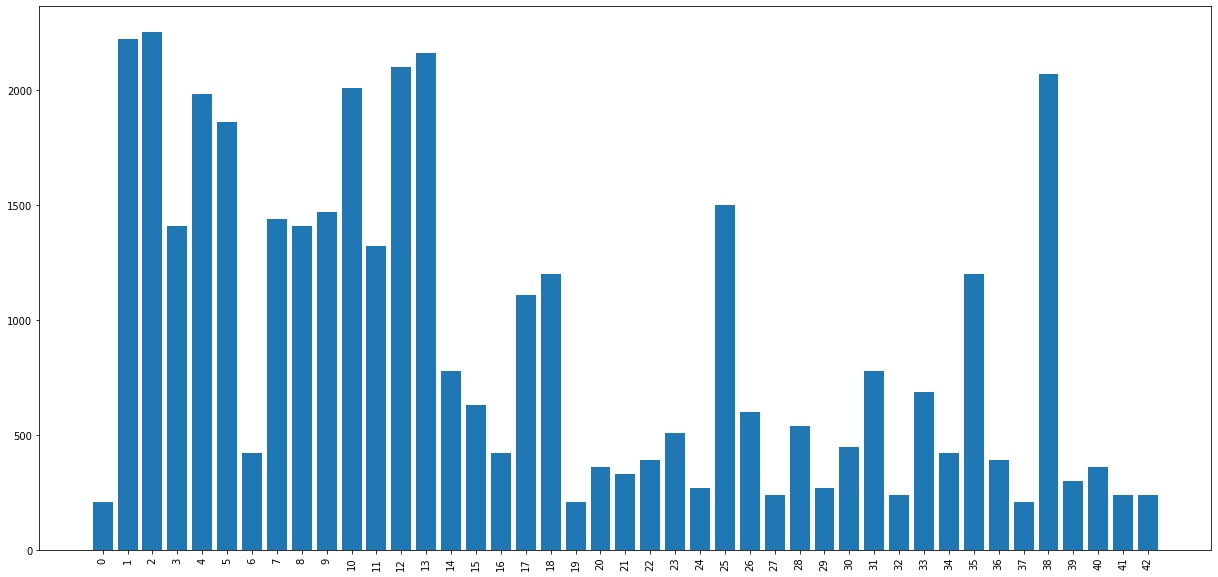

In [27]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(int(folder))
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

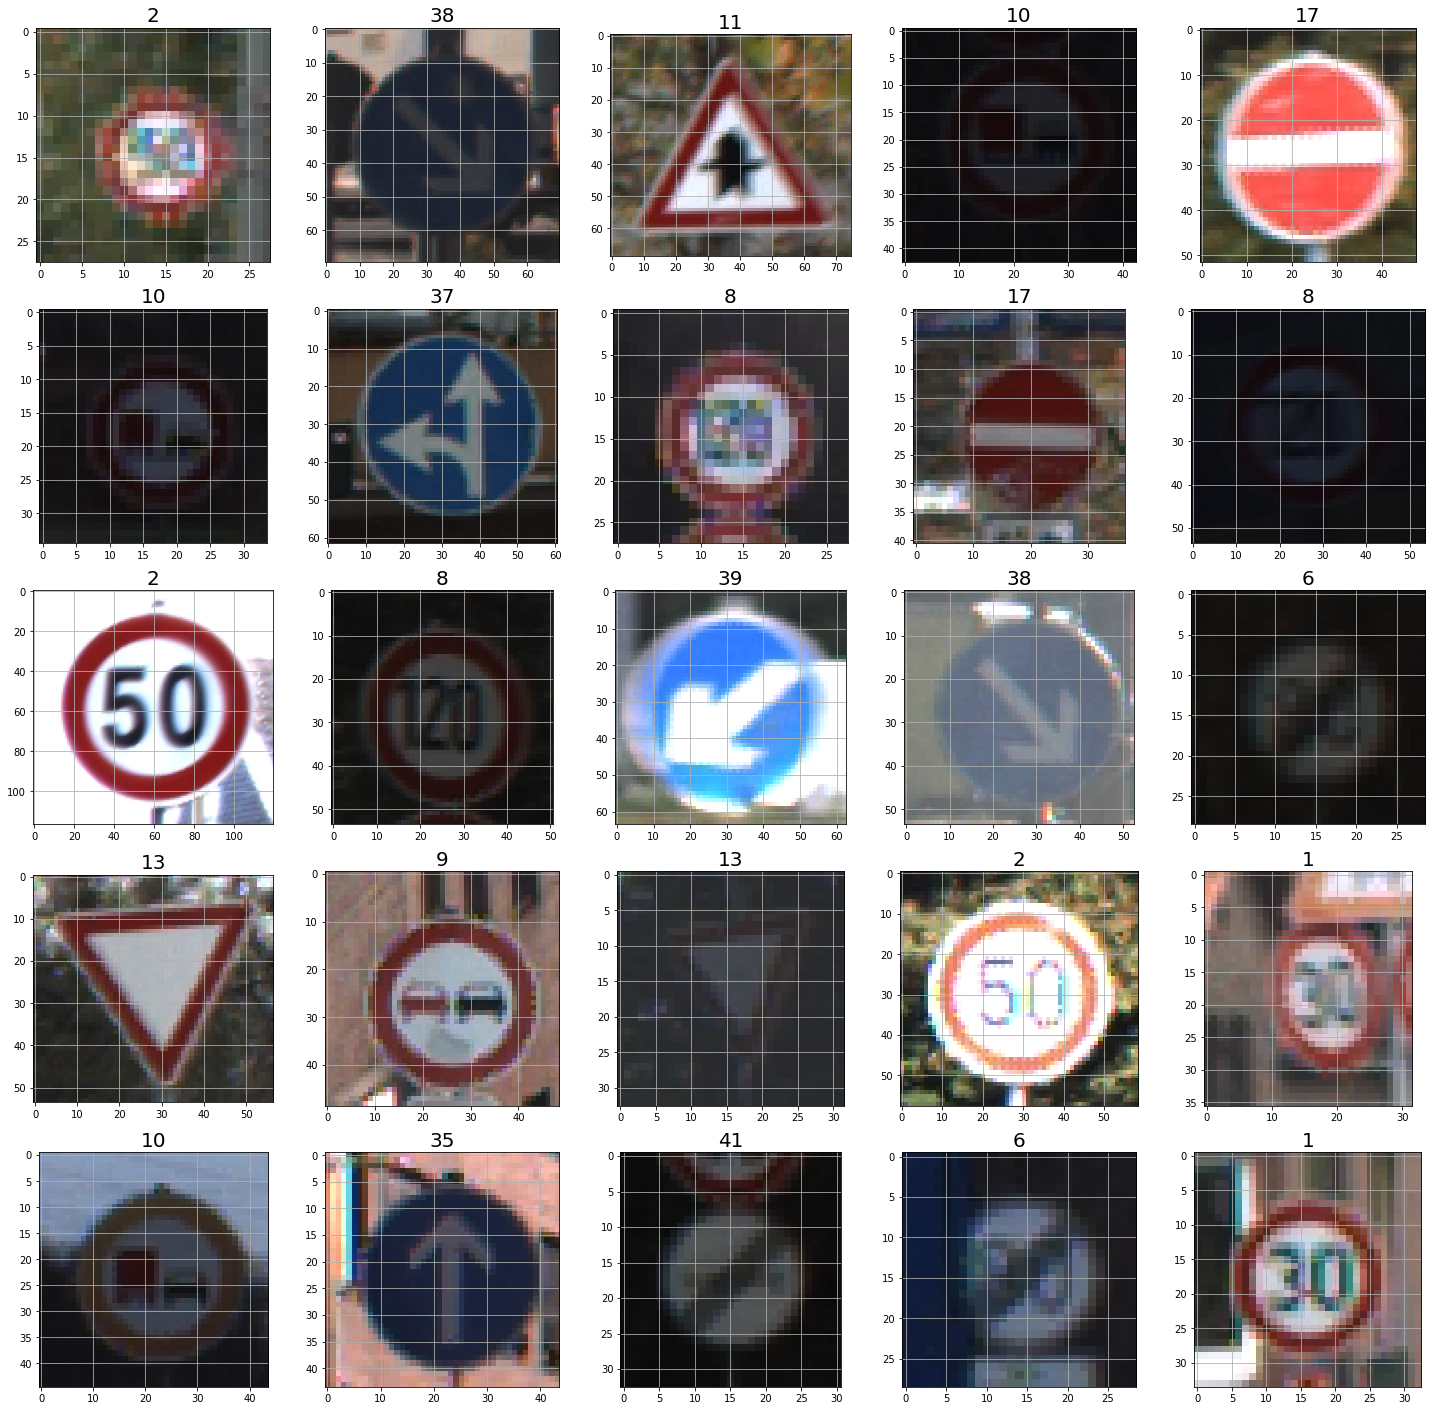

In [28]:
import random
from matplotlib.image import imread

train_df = pd.read_csv(data_dir + '/Train.csv')
imgs = train_df["Path"].values
labels = train_df["ClassId"]

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    rnd = random.randint(0, len(imgs))
    random_img_path = data_dir + '/' + imgs[rnd]
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.title(str(labels[rnd]),  fontsize = 20)
    # plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    # plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [29]:
from skimage.feature import hog

def get_hog(img_path):
   im = np.array(Image.open(img_path).convert('L'))
   im = cv2.resize(im, (32, 32))
   #feature extractor
   img_features =  hog(im,orientations=9,pixels_per_cell=(8,8),
                  cells_per_block=(2,2)
                 )
   return np.array(img_features)

c = list(zip(imgs, labels))
random.shuffle(c)
imgs, labels = zip(*c)

x_train = []
y_train = []
for path, label in zip(imgs, labels):
  x_train.append(get_hog(path))
  y_train.append(label)

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(39209, 324)
(39209,)


In [30]:
svc = SVC()
svc.fit(x_train, y_train)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

mlp = MLPClassifier(random_state=1, max_iter=150).fit(x_train, y_train)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
import pickle
filename = 'svm.sav'
pickle.dump(svc, open(filename, 'wb'))
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))
filename = 'mlp.sav'
pickle.dump(mlp, open(filename, 'wb'))
filename = 'gnb.sav'
pickle.dump(gnb, open(filename, 'wb'))

In [32]:
test_df = pd.read_csv(data_dir + '/Test.csv')
test_imgs = test_df["Path"].values
test_labels = test_df["ClassId"]

x_test = []
y_test = []
for path, label in zip(test_imgs, test_labels):
  x_test.append(get_hog(path))
  y_test.append(label)

x_test, y_test = np.array(x_test), np.array(y_test)


In [33]:
y_pred_svm = svc.predict(x_test)
print("svm Accuracy score of model is ",accuracy_score(y_pred=y_pred_svm,y_true=y_test)*100)
print("svm f1  score of model is ",f1_score(y_pred=y_pred_svm,y_true=y_test, average="weighted")*100)
print("svm recall score of model is ",recall_score(y_pred=y_pred_svm,y_true=y_test, average="weighted")*100)
print("svm precision score of model is ",precision_score(y_pred=y_pred_svm,y_true=y_test, average="weighted")*100)

y_pred_knn = knn.predict(x_test)

print("#" * 100)
print("\n knn Accuracy score of model is ",accuracy_score(y_pred=y_pred_knn,y_true=y_test)*100)
print("knn f1  score of model is ",f1_score(y_pred=y_pred_knn,y_true=y_test, average="weighted")*100)
print("knn recall score of model is ",recall_score(y_pred=y_pred_knn,y_true=y_test, average="weighted")*100)
print("knn precision score of model is ",precision_score(y_pred=y_pred_knn,y_true=y_test, average="weighted")*100)

y_pred_mlp = mlp.predict(x_test)
print("#" * 100)

print("\n mlp Accuracy score of model is ",accuracy_score(y_pred=y_pred_mlp,y_true=y_test)*100)
print("mlp f1  score of model is ",f1_score(y_pred=y_pred_mlp,y_true=y_test, average="weighted")*100)
print("mlp recall score of model is ",recall_score(y_pred=y_pred_mlp,y_true=y_test, average="weighted")*100)
print("mlp precision score of model is ",precision_score(y_pred=y_pred_mlp,y_true=y_test, average="weighted")*100)

y_pred_gnb = gnb.predict(x_test)
print("#" * 100)

print("\n gnb Accuracy score of model is ",accuracy_score(y_pred=y_pred_gnb,y_true=y_test)*100)
print("gnb f1  score of model is ",f1_score(y_pred=y_pred_gnb,y_true=y_test, average="weighted")*100)
print("gnb recall score of model is ",recall_score(y_pred=y_pred_gnb,y_true=y_test, average="weighted")*100)
print("gnb precision score of model is ",precision_score(y_pred=y_pred_gnb,y_true=y_test, average="weighted")*100)

y_pred_clf = clf.predict(x_test)
print("#" * 100)

print("\n clf Accuracy score of model is ",accuracy_score(y_pred=y_pred_clf,y_true=y_test)*100)
print("clf f1  score of model is ",f1_score(y_pred=y_pred_clf,y_true=y_test, average="weighted")*100)
print("clf recall score of model is ",recall_score(y_pred=y_pred_clf,y_true=y_test, average="weighted")*100)
print("clf precision score of model is ",precision_score(y_pred=y_pred_clf,y_true=y_test, average="weighted")*100)


svm Accuracy score of model is  82.99287410926365
svm f1  score of model is  82.99826176615288
svm recall score of model is  82.99287410926365
svm precision score of model is  83.62360260796846
####################################################################################################

 knn Accuracy score of model is  68.71733966745843
knn f1  score of model is  69.06263625139302
knn recall score of model is  68.71733966745843
knn precision score of model is  70.46653374116558
####################################################################################################

 mlp Accuracy score of model is  80.3008709422011
mlp f1  score of model is  80.23310358870322
mlp recall score of model is  80.3008709422011
mlp precision score of model is  80.65862048920772
####################################################################################################

 gnb Accuracy score of model is  66.1520190023753
gnb f1  score of model is  66.90512839355142
gnb recall score 

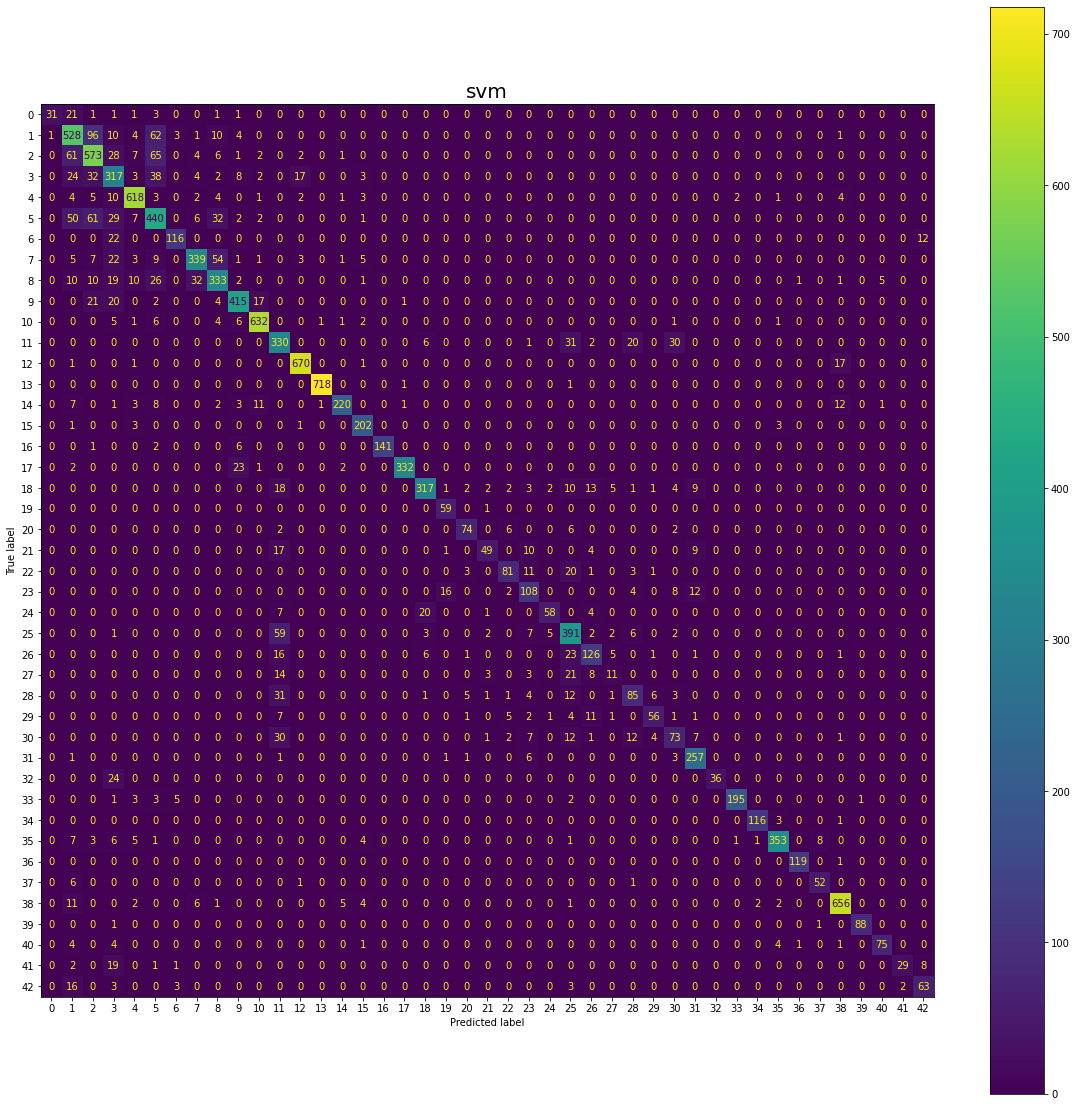

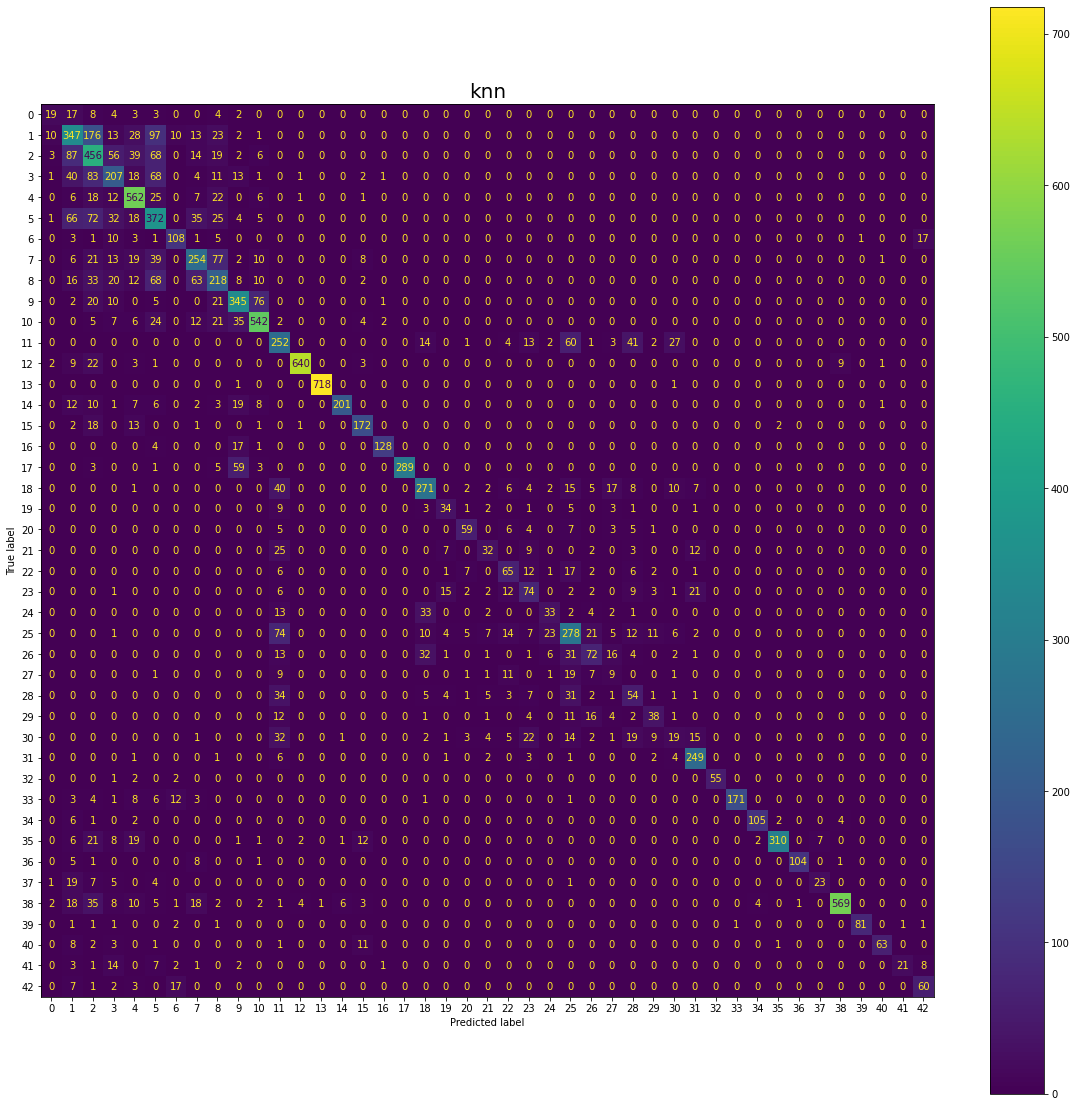

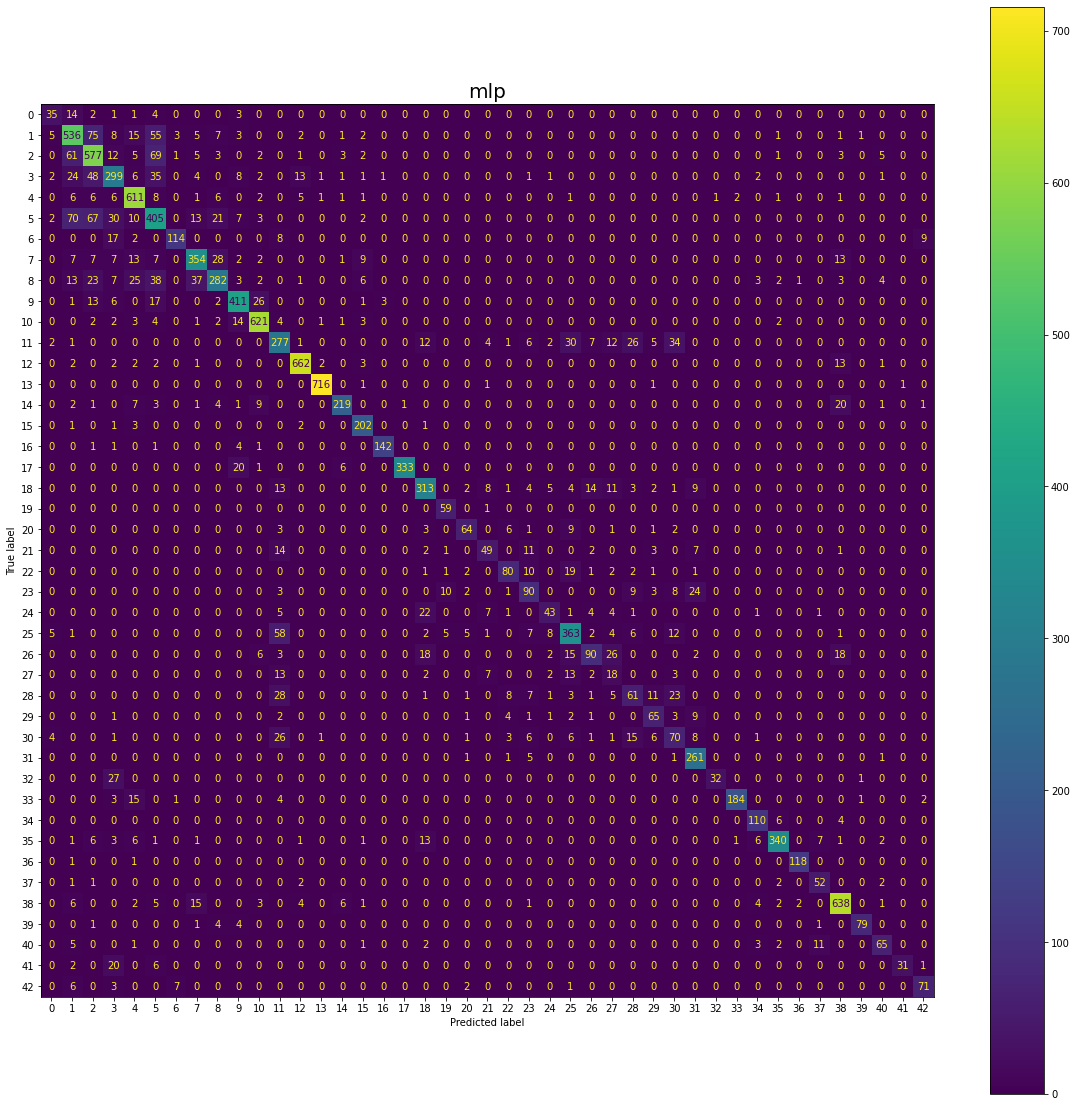

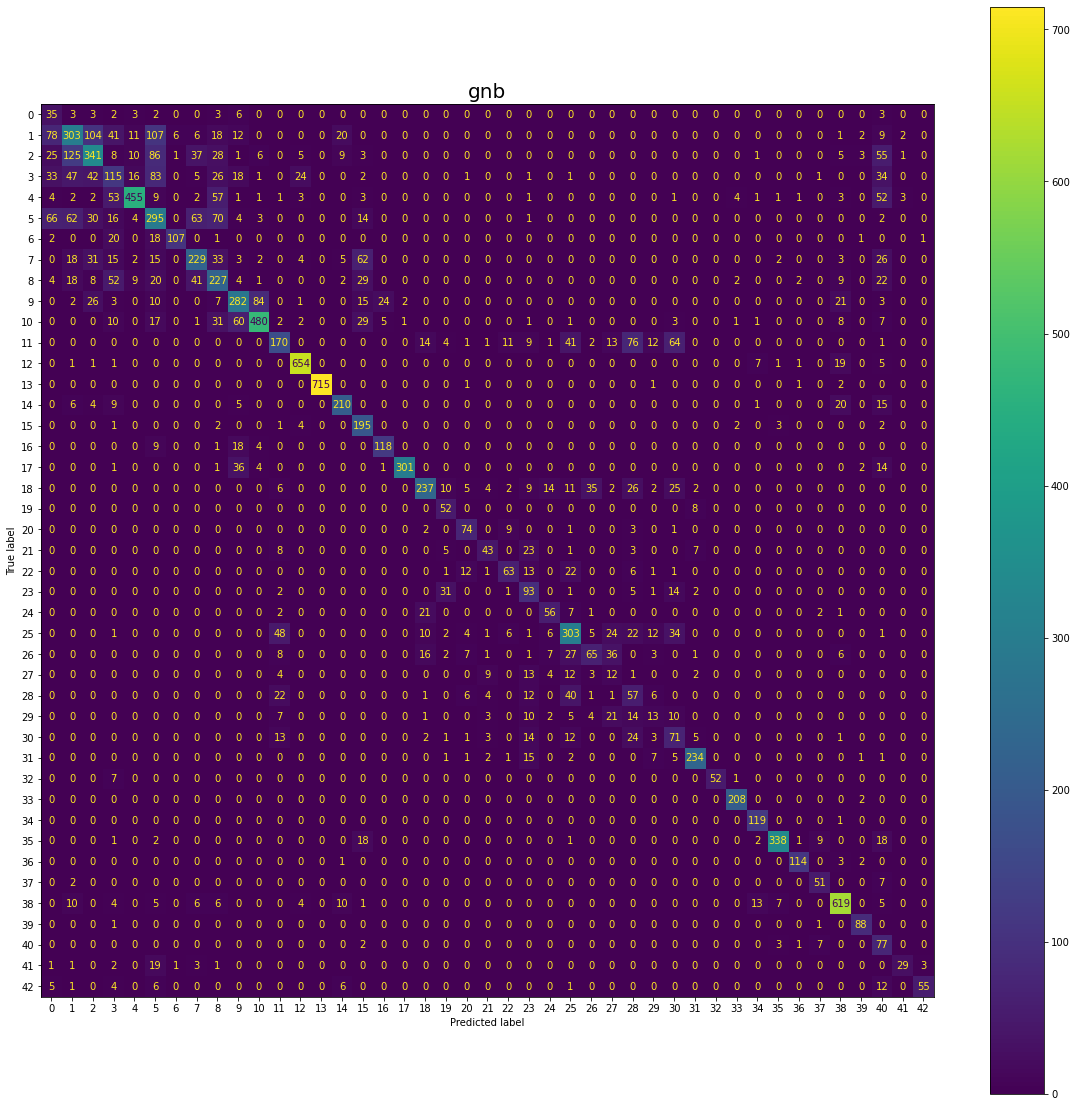

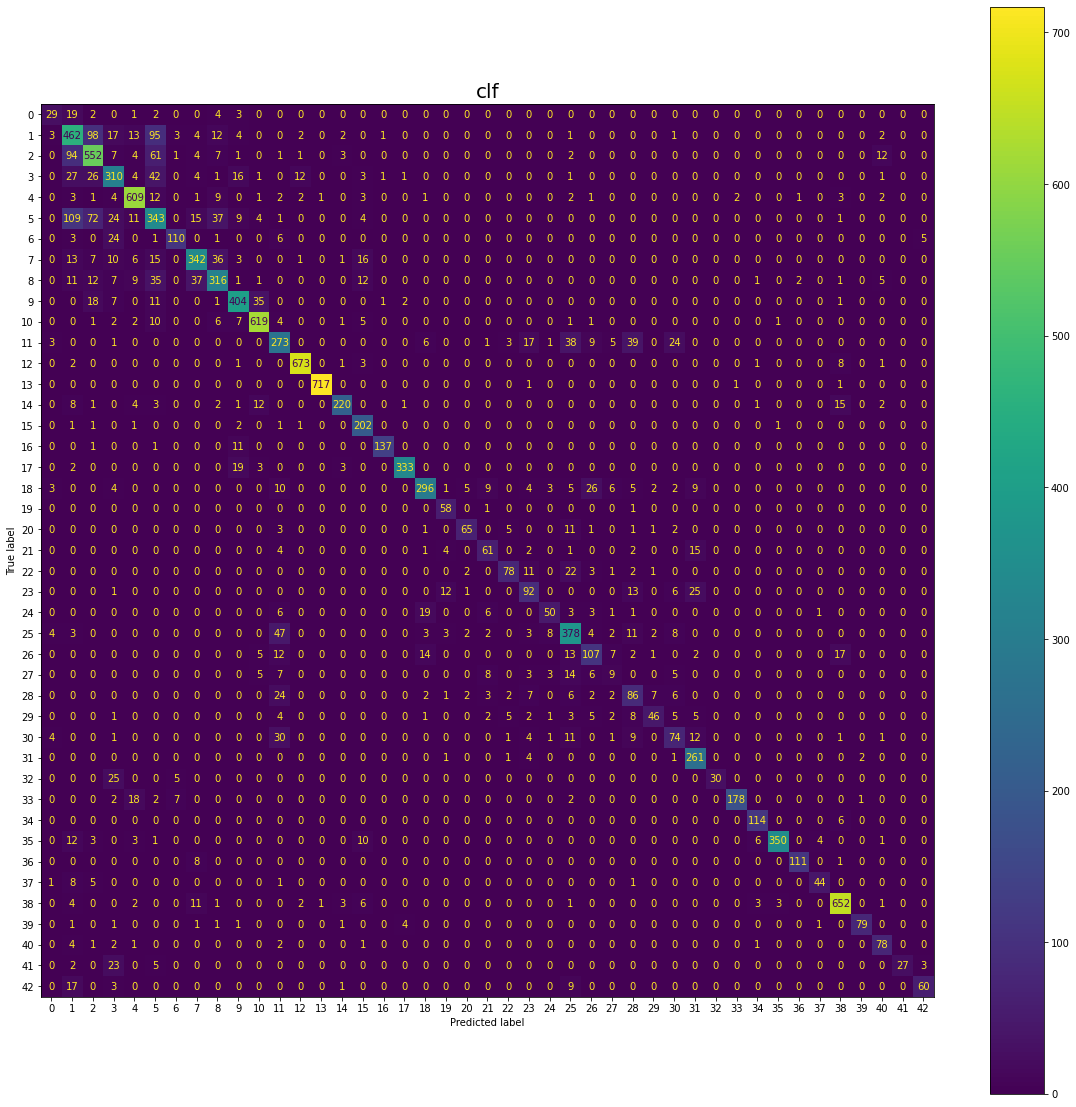

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_cm_matrix(y_test, y_pred, tiltle=None):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
  fig, ax = plt.subplots(figsize=(20,20))
  ax.set_title(tiltle, fontsize=20)
  disp.plot(ax=ax)
plot_cm_matrix(y_test, y_pred_svm, "svm")
plot_cm_matrix(y_test, y_pred_knn, "knn")
plot_cm_matrix(y_test, y_pred_mlp, "mlp")
plot_cm_matrix(y_test, y_pred_gnb, "gnb")
plot_cm_matrix(y_test, y_pred_clf, "clf")